# 1. Mutual Information

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plt.style.use('seaborn-whitegrid')

In [4]:
df = pd.read_csv('./autos.csv')
df.head(3)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500


In [5]:
X = df.copy()
y = X.pop('price')

## Data preparation

In [7]:
# Label encoding for categoricals
for colname in X.select_dtypes('object'):
    X[colname], _ = X[colname].factorize()

In [11]:
X.head(5)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
1,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
2,1,0,0,0,2,1,0,0,94.5,171.2,...,6,152,0,2.68,3.47,9,154,5000,19,26
3,2,1,0,0,4,2,1,0,99.8,176.6,...,4,109,0,3.19,3.40,10,102,5500,24,30
4,2,1,0,0,4,2,2,0,99.4,176.6,...,5,136,0,3.19,3.40,8,115,5500,18,22


## Computing

In [12]:
# in sklearn, '_regression' is for real-valued, 
# '_classif' is for categorical targets
from sklearn.feature_selection import mutual_info_regression

In [13]:
def make_mi_scores(X, y, dicrete_features):
    mi_scores = mutual_info_regression(X, y, 
                                       discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name = 'MI Scores', index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores

In [15]:
discrete_features = X.dtypes == int
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

curb_weight          1.570363
horsepower           1.273262
engine_size          1.004449
highway_mpg          0.956856
city_mpg             0.864423
width                0.680684
length               0.619792
wheel_base           0.582249
make                 0.543944
fuel_system          0.483333
bore                 0.476769
peak_rpm             0.452068
stroke               0.391586
height               0.364127
drive_wheels         0.332973
num_of_cylinders     0.331337
symboling            0.231557
engine_type          0.151769
compression_ratio    0.133250
aspiration           0.087755
body_style           0.080189
fuel_type            0.048139
engine_location      0.035905
num_of_doors         0.011409
Name: MI Scores, dtype: float64

## Ploting

In [16]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')

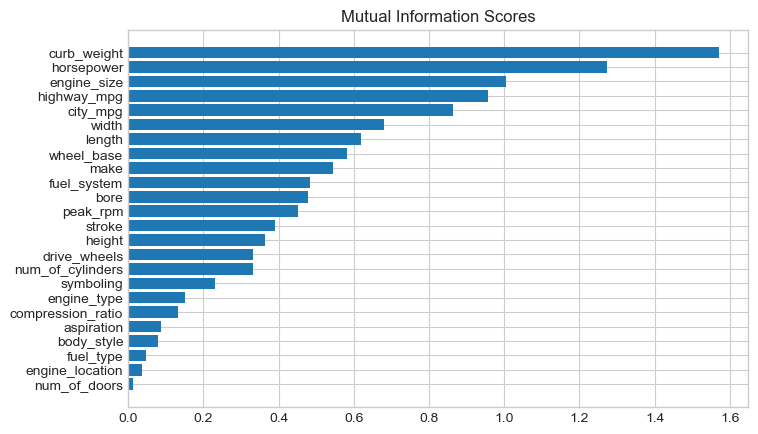

In [17]:
plt.figure(dpi = 100, figsize=(8,5))
plot_mi_scores(mi_scores)

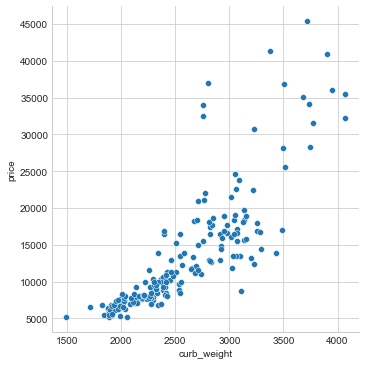

In [18]:
sns.relplot(x = 'curb_weight', y = 'price', data = df)

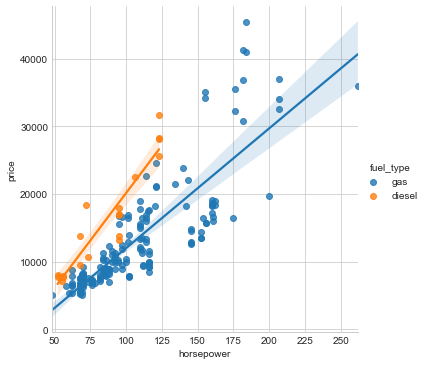

In [19]:
sns.lmplot(x = 'horsepower', y = 'price', hue = 'fuel_type', data = df)

# 2. Creating Features

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout = True)
plt.rc(
    'axes', labelweight = 'bold', labelsize = 'large', 
    titleweight = 'bold', titlesize = 14, titlepad = 10)

In [3]:
accidents = pd.read_csv('./accidents.csv')
autos = pd.read_csv('./autos.csv')
concrete = pd.read_csv('./concrete.csv')
customer = pd.read_csv('./customer.csv')

## Mathematical Transforms

In [37]:
autos['stroke_ratio'] = autos.stroke / autos.bore
autos[['stroke', 'bore', 'stroke_ratio']].head(3)

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776


<AxesSubplot:xlabel='Wind_Speed(mph)', ylabel='Density'>

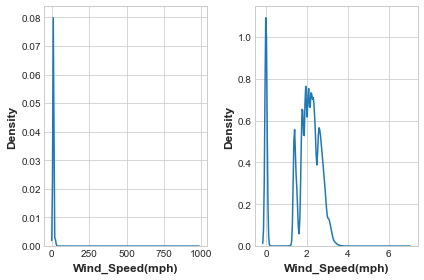

In [41]:
fig, axs = plt.subplots(1, 2)
sns.kdeplot(accidents['Wind_Speed(mph)'], ax = axs[0])
sns.kdeplot(accidents['Wind_Speed(mph)'].apply(np.log1p), ax = axs[1])

## Counts

In [4]:
accidents.head(3)

,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,...,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal
0,2,2019-07-22 14:43:06,2019-07-22 16:22:19,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,...,False,False,False,False,False,False,False,False,False,False
1,2,2019-03-20 16:12:14,2019-03-20 16:41:05,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,...,False,False,False,False,False,False,False,False,False,False
2,3,2018-12-12 14:19:18,2018-12-12 14:48:56,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,...,False,False,False,False,False,False,False,False,False,False


### sum the total number of binary features

In [5]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]

In [6]:
accidents['RoadwayFeatures'] = accidents[roadway_features].sum(axis='columns')
accidents[['RoadwayFeatures'] + roadway_features].head(10)

,RoadwayFeatures,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal
0,0,False,False,False,False,False,False,False,False,False,False,False,False
1,0,False,False,False,False,False,False,False,False,False,False,False,False
2,0,False,False,False,False,False,False,False,False,False,False,False,False
3,0,False,False,False,False,False,False,False,False,False,False,False,False
4,0,False,False,False,False,False,False,False,False,False,False,False,False
5,1,False,False,False,False,True,False,False,False,False,False,False,False
6,0,False,False,False,False,False,False,False,False,False,False,False,False
7,2,False,False,True,False,False,False,False,False,False,False,False,True
8,2,False,False,True,False,False,False,False,False,False,False,False,True
9,0,False,False,False,False,False,False,False,False,False,False,False,False


 ### Create boolean values and then sum

In [63]:
# .gt() greater than return boolean
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete['Components'] = concrete[components].gt(0).sum(axis = 'columns')

In [66]:
concrete[['Components'] + components].head(10)

,Components,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate
0,5,540.0,0.0,0.0,162.0,2.5,1040.0,676.0
1,5,540.0,0.0,0.0,162.0,2.5,1055.0,676.0
2,5,332.5,142.5,0.0,228.0,0.0,932.0,594.0
3,5,332.5,142.5,0.0,228.0,0.0,932.0,594.0
4,5,198.6,132.4,0.0,192.0,0.0,978.4,825.5
5,5,266.0,114.0,0.0,228.0,0.0,932.0,670.0
6,5,380.0,95.0,0.0,228.0,0.0,932.0,594.0
7,5,380.0,95.0,0.0,228.0,0.0,932.0,594.0
8,5,266.0,114.0,0.0,228.0,0.0,932.0,670.0
9,4,475.0,0.0,0.0,228.0,0.0,932.0,594.0


## Building-up and Breaking-down Features

In [20]:
customer.head(3)

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize,Type,Level
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Corporate,L3
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Personal,L3
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Personal,L3


In [49]:
# n = 1 only split on the first ' '
# expand = True, it will return 2 seperate columns
customer[['Type', 'Level']] = customer['Policy'].str.split(' ', 
               n = 1, expand=True)

customer[['Policy', 'Type', 'Level']].head(3)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3


In [19]:
autos.head(3)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500


In [22]:
autos['make_and_style'] = autos['make'] + '_' + autos['body_style']

autos[['make', 'body_style', 'make_and_style']].head(3)

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback


## Group Transforms

In [23]:
customer.head(3)

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize,Type,Level
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Corporate,L3
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Personal,L3
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Personal,L3


In [35]:
# transform('mean')相比mean()，结果不聚合，不改变行数
customer['AverageIncome'] = customer.groupby('State').Income.transform('mean')

customer[['State', 'Income', 'AverageIncome']].head(3)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442


In [38]:
customer.groupby('State').State.transform('count') / customer.State.count()

0       0.087366
1       0.186446
2       0.096562
3       0.344865
4       0.087366
          ...   
9129    0.344865
9130    0.344865
9131    0.344865
9132    0.344865
9133    0.344865
Name: State, Length: 9134, dtype: float64

## Training and Validition Splits

In [41]:
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

In [45]:
df_train['AverageClaim'] = df_train.groupby('Coverage')['ClaimAmount'].transform('mean')
df_valid = df_valid.merge(
    df_train[['Coverage', 'AverageClaim']].drop_duplicates(), 
    on = 'Coverage', 
    how = 'left')

In [46]:
df_valid[['Coverage', 'AverageClaim']].head(5)

,Coverage,AverageClaim
0,Extended,485.121240
1,Premium,656.259747
2,Basic,375.166645
3,Basic,375.166645
4,Basic,375.166645


## Dummy Coding

In [48]:
pd.get_dummies(customer.RenewOfferType, prefix='RenewOffer')

,RenewOffer_Offer1,RenewOffer_Offer2,RenewOffer_Offer3,RenewOffer_Offer4
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
9129,0,1,0,0
9130,1,0,0,0
9131,1,0,0,0
9132,0,0,1,0


# 3. Clustering with K-Means

- Why?


The clusters will break up complicated relationships across features into simpler chunks.

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [51]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [53]:
df = pd.read_csv('./housing.csv')
X = df.loc[:, ['MedInc', 'Latitude', 'Longitude']]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [58]:
kmeans = KMeans(n_clusters=6)
X['Cluster'] = kmeans.fit_predict(X)
X['Cluster'] = X['Cluster'].astype('category')
X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,0
1,8.3014,37.86,-122.22,0
2,7.2574,37.85,-122.24,0
3,5.6431,37.85,-122.25,0
4,3.8462,37.85,-122.25,2


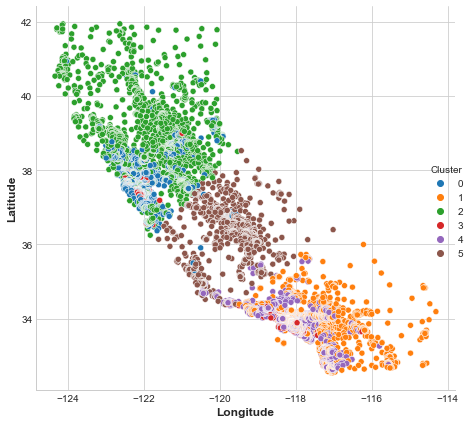

In [59]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
);

In [ ]:
X.Latitude.